In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib import cm
import datetime

In [7]:
##Exploratory Data Analysis

In [8]:
#import data
df1 = pd.read_csv('USvideos.csv')

In [9]:
#understanding data, it shows there are 16 variables and there are 40949 observations, 
#and noticed there are some data missing in the 'description'
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [10]:
#fill in the missing values in 'description' with null
df1['description'] = df1['description'].fillna('NULL')

In [11]:
# look at the first five rows and observe a handful of columns provide ancillary info
df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [12]:
# drop videos with same video_id, since it's a duplicate
df1.drop_duplicates()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NULL
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [14]:
#calculate the mean of views, likes, dislikes, and comment_count
df1[['views', 'likes', 'dislikes', 'comment_count']].agg('mean')

views            2.360785e+06
likes            7.426670e+04
dislikes         3.711401e+03
comment_count    8.446804e+03
dtype: float64

In [15]:
df1.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [16]:
# data cleaning
df1['tags'] = df1['tags'].apply(lambda x: x.replace('|',' ').replace('"',""))

In [17]:
#import json file and find corresponding categories
df_category= pd.read_json('US_category_id.json')
df_category.head
df_category = pd.json_normalize(df_category['items'])

In [18]:
#obtain category names corresponds to category ids
df_category['id'] = pd.to_numeric(df_category['id'])
df1=df1.merge(df_category,how='inner', left_on='category_id', right_on='id')
df1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,...,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,...,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False


In [19]:
df_renamed = df1.rename(columns={'snippet.title': 'category'})
df_renamed

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,category,snippet.assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,...,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,...,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False


In [20]:
df = df_renamed.drop(columns= ['kind', 'etag', 'snippet.channelId', 'snippet.assignable'], axis = 1)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows


In [21]:
#select the numeric column
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['category_id' 'views' 'likes' 'dislikes' 'comment_count' 'id']


In [22]:
#Fix data format for numeric column
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [23]:
#select the non-numeric column
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['video_id' 'trending_date' 'title' 'channel_title' 'category_id'
 'publish_time' 'tags' 'thumbnail_link' 'comments_disabled'
 'ratings_disabled' 'video_error_or_removed' 'description' 'category']


In [24]:
#format date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [25]:
#format time
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-04-21 06:47:32
2   2017-11-11 15:00:03
3   2017-11-11 18:08:04
4   2017-11-11 01:19:33
Name: publish_time, dtype: datetime64[ns]

In [26]:
#divide the date and time in seperate column
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-04-21,06:47:32
2,2017-11-11,15:00:03
3,2017-11-11,18:08:04
4,2017-11-11,01:19:33


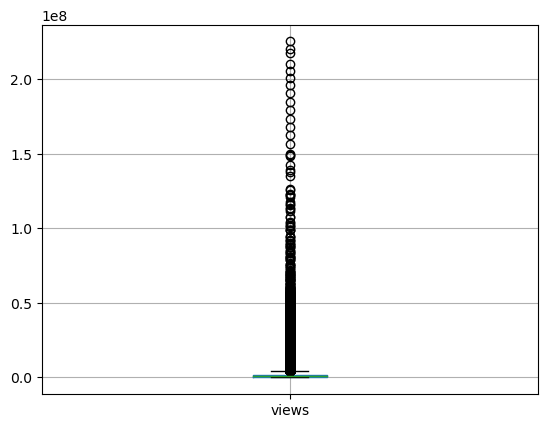

In [27]:
#find outlier
df.boxplot(column=['views'])
plt.show()
#no outlier shown

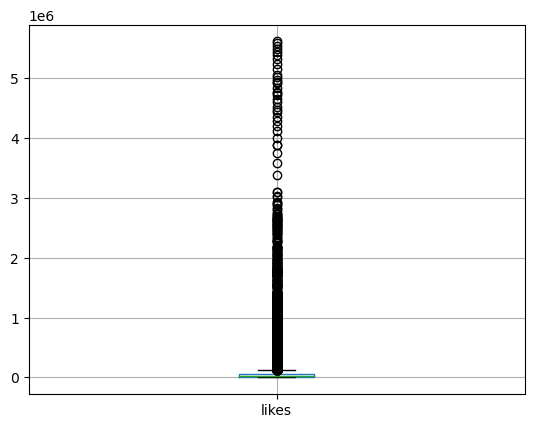

In [28]:
df.boxplot(column=['likes'])
plt.show()

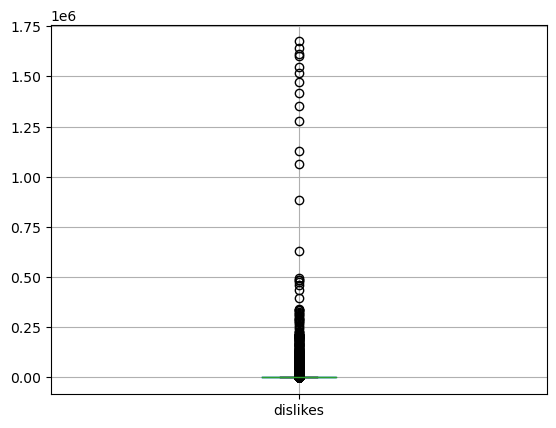

In [29]:
df.boxplot(column=['dislikes'])
plt.show()

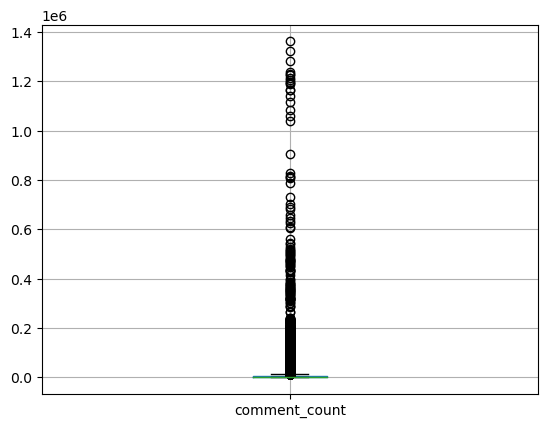

In [30]:
df.boxplot(column=['comment_count'])
plt.show()

In [31]:
#we can see there are no obvious outlier in the numerical column

In [32]:
#we want to see if there's outlier in categorical column
df['category_id'].describe()
#no outlier shown

count     40949
unique       16
top          24
freq       9964
Name: category_id, dtype: object

In [33]:
#check for duplicates
df.isna().sum()
#no duplicates shown

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
id                        0
category                  0
dtype: int64

In [34]:
## Data Analysis

In [35]:
#Visualizing numerical data using heatmap
#obtain matrix only contains numerical columns
numeric = ['views', 'likes', 'dislikes', 'comment_count']
matrix_numeric = df[numeric].corr()
matrix_numeric

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\2659667256.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, minor=False)
C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\2659667256.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, minor=False)


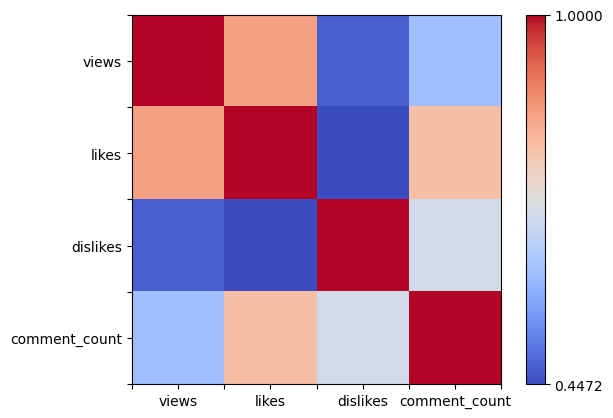

In [36]:
#plot in heat map
fig, ax = plt.subplots()
heatmap = ax.imshow(matrix_numeric, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = matrix_numeric.min().min()
cbar_max = matrix_numeric.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in numeric:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

#from the heatmap, we noticed that views is strongly correlated with likes, dislikes, and comment_count

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\2102889240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47))


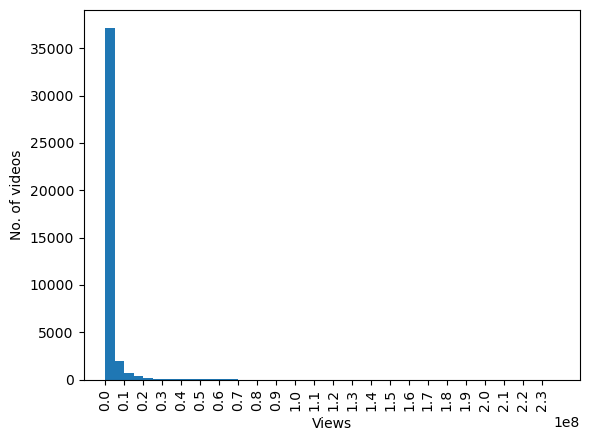

In [37]:
#construct histogram for 'views' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47))
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)
plt.show()

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\1107766891.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["views"]<=5e7]["likes"], kde = False, hist_kws={'alpha':1})


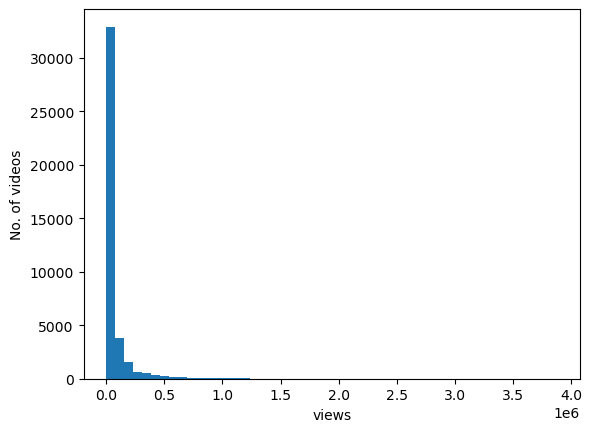

In [38]:
#we noticed that most trending videos have views between 0 and 100000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["views"]<=5e7]["likes"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "views", ylabel = "No. of videos")
plt.show()

In [39]:
#take a look at the proportion of the videos which have views between 1 to 100000000
df[df['views'] < 1e8]['views'].count() / df['views'].count() * 100

99.90231751691128

In [40]:
#take a look at the proportion of the videos which have views between 1 to 10000000
df[df['views'] < 1e7]['views'].count() / df['views'].count() * 100

95.48706928130113

In [41]:
#we conclude that 95% of the trending videos have views between 0 to 10000000

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\3279190821.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["likes"], kde=False,


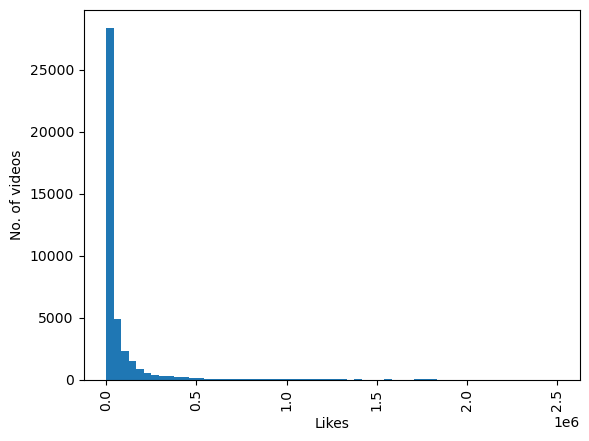

In [42]:
#construct histogram for 'likes' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2.5e6, 61))
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)
plt.show()

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\1011097673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["likes"]<=1e6]["likes"], kde = False, hist_kws={'alpha':1})


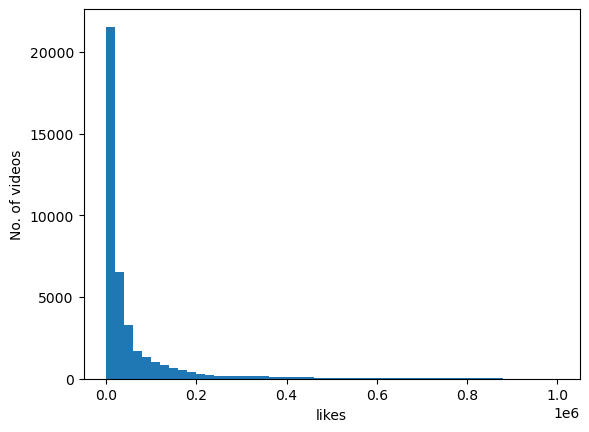

In [43]:
#we noticed that most trending videos have likes between 0 and 1000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["likes"]<=1e6]["likes"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "likes", ylabel = "No. of videos")
plt.show()

In [44]:
#from above, we noticed that most trending videos have likes between 0 to 400000 likes, so we want to see some proportions here
df[df['likes'] < 4e5]['likes'].count() / df['likes'].count() * 100

96.58111309189479

In [45]:
#also take a look at the total proportion of the videos within 1000000 likes
df[df['likes'] < 1e6]['likes'].count() / df['likes'].count() * 100

99.09887909350655

In [46]:
#we conclude that the majority of trending videos have likes within 1000000 likes

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\625666929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["comment_count"], kde=False,


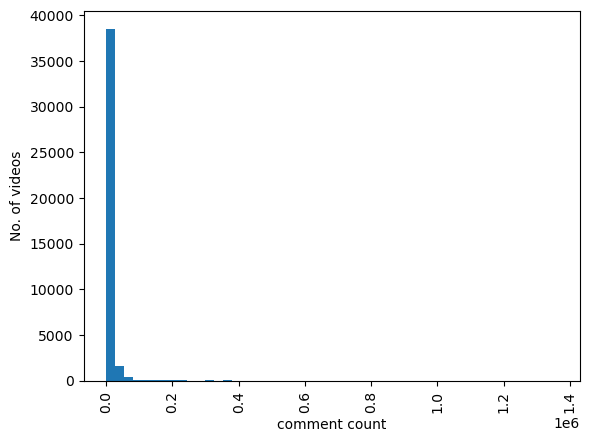

In [47]:
#construct histogram for 'comment_count' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, 
                 hist_kws={'alpha': 1})
_ = ax.set(xlabel="comment count", ylabel="No. of videos")
_ = plt.xticks(rotation=90)
plt.show()

In [48]:
#we noticed that most trending videos have likes between 0 and 200000. Let's look closer at the data within that range

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\3814745854.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["comment_count"]<=200000]["comment_count"], kde = False, hist_kws={'alpha':1})


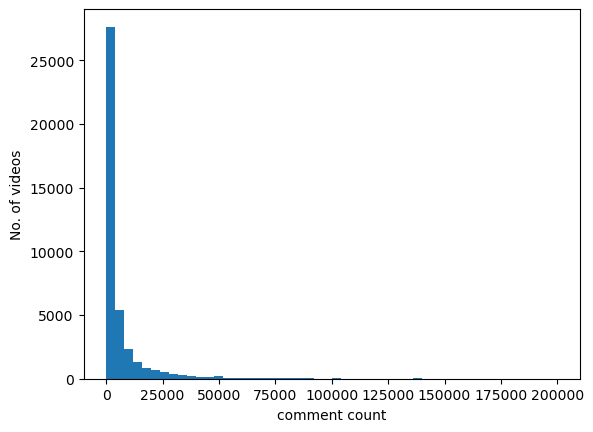

In [49]:
fig, ax = plt.subplots()
_=sns.distplot(df[df["comment_count"]<=200000]["comment_count"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "comment count", ylabel = "No. of videos")
plt.show()

In [50]:
#from the graph, we see that most trending videos have comment count between 0 to 37500, let take a look at the proportion
df[df['comment_count'] < 37500]['comment_count'].count() / df['comment_count'].count() 

0.96202593469926

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\2589394245.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df[df["comment_count"]==0]["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2e8, 47))


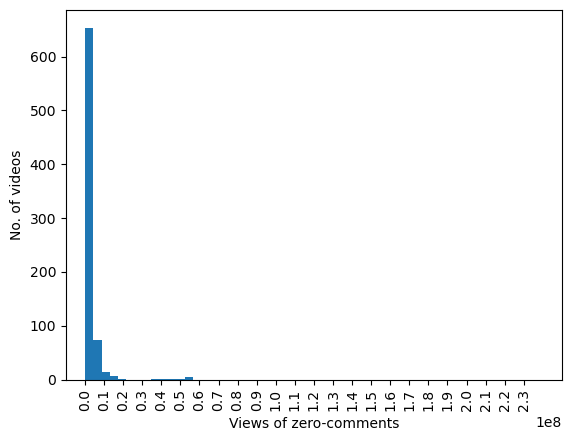

In [51]:
#another thing we want to look at is that for the videos with 0 comment as well as comment disabled
#we want to analyze their views
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"]==0]["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2e8, 47))
_ = ax.set(xlabel="Views of zero-comments", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)
plt.show()

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\3430875098.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["comment_count"]==0]["views"], kde = False, hist_kws={'alpha':1}, ax = ax)


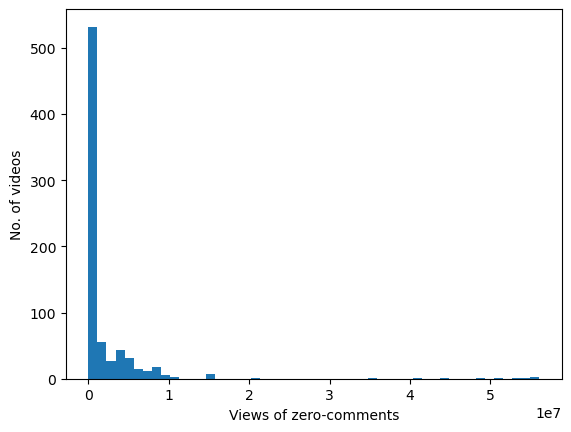

In [52]:
#we noticed that most trending videos have 0 comment between 0 and 1000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["comment_count"]==0]["views"], kde = False, hist_kws={'alpha':1}, ax = ax)
_=ax.set(xlabel = "Views of zero-comments", ylabel = "No. of videos")
plt.show()

In [53]:
#with the above graph, we noticed that there is a large portion of videos with zero comments have very few views.
#while we want to look into those videos which still have large number of views with comments disabled. 
df["comments_disabled"].value_counts(normalize=True)
#we can see that around 1.5% of the videos have comment disabled, which indicates that comment-disabled may not have significant effects in our analysis

comments_disabled
False    0.984542
True     0.015458
Name: proportion, dtype: float64

In [54]:
#let's find out how many videos have their rating disabled
df["ratings_disabled"].value_counts(normalize=True)
#we can see that only 0.4% of the videos have rating disabled, which indicates that rating-disabled may not have significant effects in our analysis

ratings_disabled
False    0.995873
True     0.004127
Name: proportion, dtype: float64

In [55]:
#However, we want to look at the videos with both comment and rating disabled while still have large number of views 
df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].describe()
#from the information provided below, we can conclude that the videos with both comment and rating disabled have 0 likes and dislikes
#while still have views up to around 56000000, this suggest that such videos may not be very representative
#with the total count of such videos is 106, around 0.2% of the total videos, it will have tiny effects to our analysis

,trending_date,views,likes,dislikes,comment_count,id
count,106,1.060000e+02,106.0,106.0,106.0,106.000000
mean,2018-01-31 08:36:13.584905728,6.002661e+06,0.0,0.0,0.0,20.264151
min,2017-11-21 00:00:00,1.456000e+03,0.0,0.0,0.0,1.000000
25%,2017-12-08 06:00:00,8.889950e+04,0.0,0.0,0.0,17.000000
50%,2018-02-07 12:00:00,8.562450e+05,0.0,0.0,0.0,22.000000
75%,2018-03-08 18:00:00,1.049482e+06,0.0,0.0,0.0,26.000000
max,2018-04-06 00:00:00,5.611196e+07,0.0,0.0,0.0,29.000000
std,NaN,1.391286e+07,0.0,0.0,0.0,8.182795


In [56]:
#Before looking at correlation between numerical column, we want to first see the distribution of 
#category related to the number of trending videos and see if it's balanced distributed 

In [57]:
#look at number of trending videos of different category
df['category'].value_counts()

category
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: count, dtype: int64

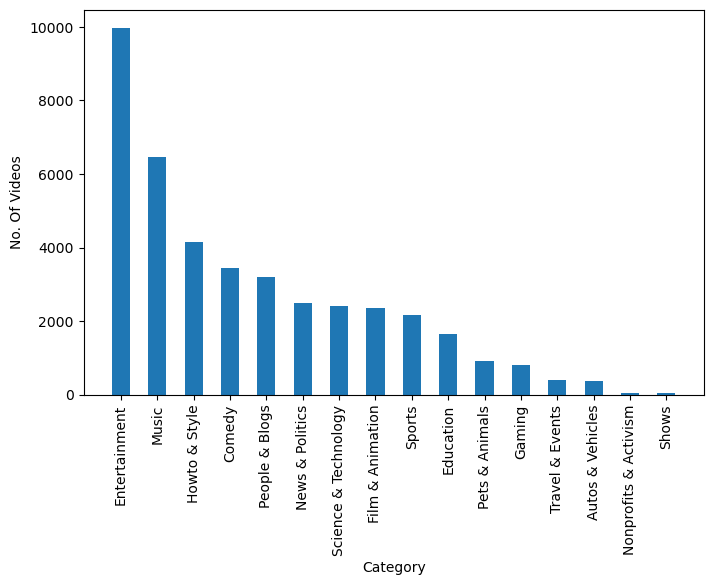

In [58]:
my_dict = (df['category'].value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()),
                     columns = ['Category','No. Of Videos']) 
fig = plt.figure(figsize = (8,5))
plt.bar(count['Category'],count['No. Of Videos'], width=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("No. Of Videos")
plt.show()

In [59]:
#from the above graph, we can see the Entertainment has the largest number of trending videos 
#at approximately 10000. Music and Howto & style are followed. 

In [60]:
#create a new data frame containing only Entertainment category
df_e = df[df.category == 'Entertainment']
df_e

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category
3210,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,last week tonight trump presidency last week t...,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
3211,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,rhett and link gmm good mythical morning rhett...,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
3212,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment
3213,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,2017-11-12,24,05:37:17,SNL Saturday Night Live SNL Season 43 Episode ...,2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,24,Entertainment
3214,VifQlJit6A0,2017-11-14,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,2017-11-13,24,03:00:00,The Walking Dead shiva tiger king ezekiel epis...,104578,1576,303,1279,https://i.ytimg.com/vi/VifQlJit6A0/default.jpg,False,False,False,Shiva arrives just in time as King Ezekiel att...,24,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,wI89nVn6LHk,2018-06-14,Maddie Poppe Wins American Idol 2018 - Finale ...,American Idol,2018-05-22,24,04:08:24,ABC americanidol idol american idol ryan seacr...,2003345,19895,2831,3481,https://i.ytimg.com/vi/wI89nVn6LHk/default.jpg,False,False,False,Maddie Poppe the crowd the American Idol 2018 ...,24,Entertainment
13170,tiF9SzzzX_o,2018-06-14,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,2018-05-22,24,02:34:39,the voice season 14 the voice finale performan...,1437051,19930,1794,1671,https://i.ytimg.com/vi/tiF9SzzzX_o/default.jpg,False,False,False,Brynn Cartelli sings Adele's Skyfall during th...,24,Entertainment
13171,Qcj15vHJTtk,2018-06-14,Royal Wedding - SNL,Saturday Night Live,2018-05-20,24,04:58:51,SNL Saturday Night Live SNL Season 43 SNL Epis...,8607264,66559,14179,8382,https://i.ytimg.com/vi/Qcj15vHJTtk/default.jpg,False,False,False,Footage from Prince Harry's (Mikey Day) weddin...,24,Entertainment
13172,_QWZvU7VCn8,2018-06-14,Brad Pitt Bid $120k For A Night With Emilia Cl...,The Graham Norton Show,2018-05-18,24,17:13:08,Graham Norton Graham Norton Show Official Ente...,5564576,46351,2295,2861,https://i.ytimg.com/vi/_QWZvU7VCn8/default.jpg,False,False,False,Check out all that Emilia Clarke merch... Subs...,24,Entertainment


In [61]:
#After analysis of each numerical column and visualization of category distribution, 
#we want to see some correlations between views and likes in the selected category

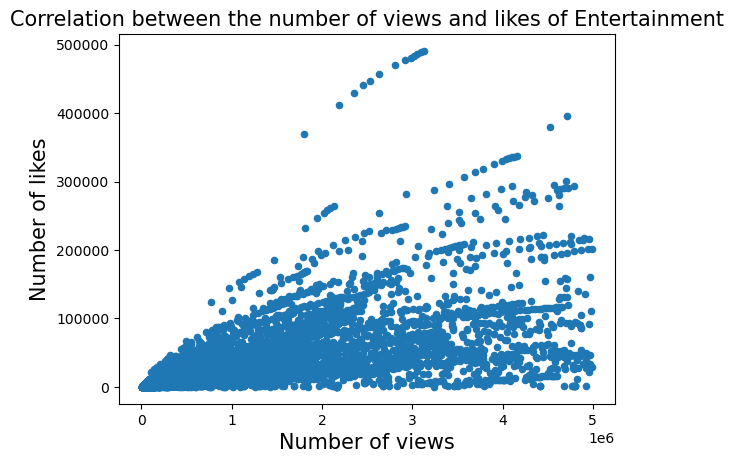

In [62]:
#1. correlation between views and likes of category Entertainment
fig = df_e[df_e['views'] < 5000000].plot.scatter(x = "views", y = "likes")
plt.title('Correlation between the number of views and likes of Entertainment', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of likes', fontsize = 15)
plt.show()
#The plot shows better scatter with dots more spread.

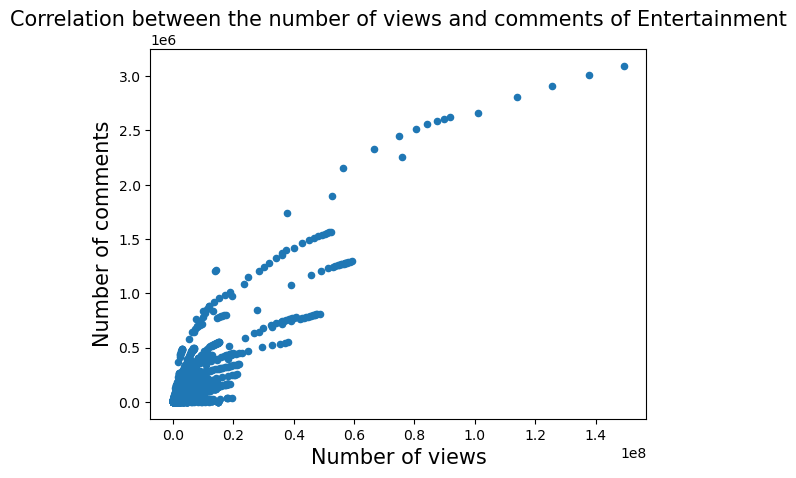

In [63]:
#2. correlation between views and comments of category Entertainment
fig = df_e[df_e['comment_count'] < 5000000].plot.scatter(x = "views", y = "likes")
plt.title('Correlation between the number of views and comments of Entertainment', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of comments', fontsize = 15)
plt.show()

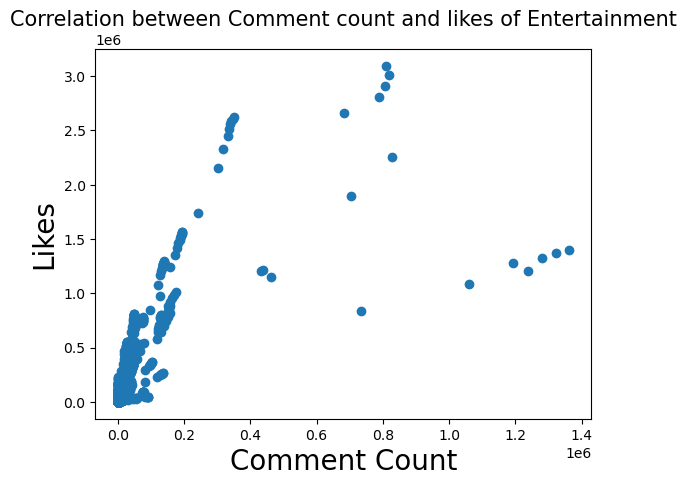

In [64]:
#3. correlation between likes and comments of category Entertainment
fig, ax = plt.subplots()
ax.scatter(df_e['comment_count'], df_e['likes'])
plt.title('Correlation between Comment count and likes of Entertainment', fontsize = 15)
plt.xlabel("Comment Count", size=20)
plt.ylabel("Likes", size=20)
plt.show()

In [65]:
#From above, we noticed there are some linear relationships between:
#the number of views and the number of likes,
#the number of views and the number of comments
#the number of comment counts and the number of likes
#Thus, we want to perform some modeling to predict if we do Entertainment,
#what will be the results

In [66]:
#Before that, we noticed that there are videos where the 'views' are similar 
#while 'likes' varies a lot. For data like this, we want to perform a fraud test
#to ensure the accuracy of our modeling
#Thus, we want to do a fraud check first

In [67]:
#Sort the DataFrame by 'category' and 'views' to group similar videos together.
df.sort_values(by=['category_id', 'views'], inplace=True)

In [68]:
#Calculate the difference in likes between consecutive rows within the same category. 
#This will help identify videos with hugely distinct numbers of likes.
df['likes_diff'] = df.groupby('category')['likes'].diff()

In [69]:
#Below, we have the new filtered dataset which eliminated the videos that
#contain fraud risk
likes_threshold = 5000
filtered_df = df[(df['likes_diff'].isna()) | (df['likes_diff'] > likes_threshold)]
filtered_df = filtered_df.drop(['id', 'likes_diff'], axis=1)

In [70]:
#Let's look at trending date and see how publish data and pulish time affect the video trend

In [71]:
#first, let's crate a new column indicating what is the day that the video is published
#add a column of what day the video is uploaded
filtered_df['publishing_day'] =  pd.to_datetime(filtered_df['publish_date']).apply(lambda x: x.strftime('%A'))
filtered_df['publishing_day']

19651       Monday
19693       Sunday
19539    Wednesday
19715    Wednesday
19558    Wednesday
           ...    
40915     Thursday
40916     Thursday
40917     Thursday
40918     Thursday
40919     Thursday
Name: publishing_day, Length: 12789, dtype: object

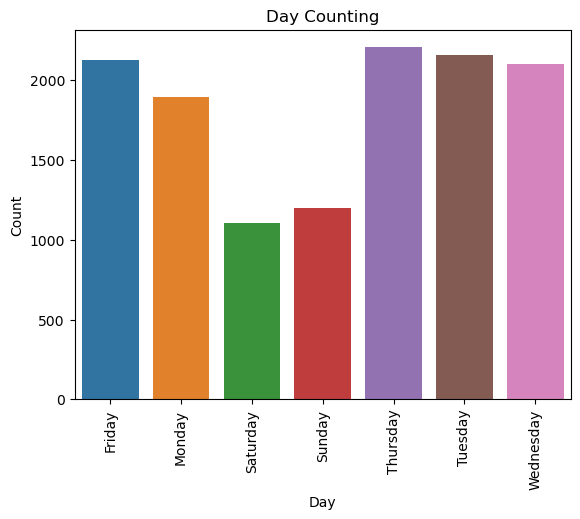

In [72]:
#plot number of videos published corresponding to different day
plt.subplot()
g = sns.countplot( x = 'publishing_day', data=filtered_df, order = sorted(filtered_df['publishing_day'].unique()))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Day Counting")
g.set_xlabel("Day")
g.set_ylabel("Count")
plt.show()
#we noticed that on Friday, Thursday, Tuesday and Wednesday, the number of trending videos are relatively larger than the other days

In [73]:
#second, let's see what hour the video is published
filtered_df[['hour','min','sec']] = filtered_df['publish_time'].astype(str).str.split(':', expand=True)
filtered_df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publishing_day,hour,min,sec
19651,s_FAjI51LPU,2018-01-07,Gas Mask Scene | Kong: Skull Island (2017),Adam Whitley,2017-08-14,1,20:33:41,gas mask samurai jordan vogt-roberts kong skul...,943,1,...,https://i.ytimg.com/vi/s_FAjI51LPU/default.jpg,False,False,False,Kong: Skull Island DVD and Blu-ray release dat...,Film & Animation,Monday,20,33,41
19693,CFwXUarN-wg,2018-01-12,GOALS GOALS GOALS,KickThePj,2018-01-07,1,16:30:41,kickthepj pjthekick goals 2018 goals resolutio...,83200,15262,...,https://i.ytimg.com/vi/CFwXUarN-wg/default.jpg,False,False,False,support the patreon! https://patreon.com/kickt...,Film & Animation,Sunday,16,30,41
19539,S4vKQbpOn5k,2017-12-30,The Applejack Problem,Jenny Nicholson,2017-12-27,1,04:42:08,[none],97298,5463,...,https://i.ytimg.com/vi/S4vKQbpOn5k/default.jpg,False,False,False,Next video is about star wars I promise.\n\nCl...,Film & Animation,Wednesday,04,42,08
19715,4yG_k2Zlw7Y,2018-01-14,GOING FISHING. A Stop motion Animation by Guldies,Guldies,2018-01-10,1,21:26:00,stop motion animation stop motion animation st...,99653,9033,...,https://i.ytimg.com/vi/4yG_k2Zlw7Y/default.jpg,False,False,False,2500 still pictures (4530 taken) played in 18 ...,Film & Animation,Wednesday,21,26,00
19558,S4vKQbpOn5k,2017-12-31,The Applejack Problem,Jenny Nicholson,2017-12-27,1,04:42:08,[none],100450,5577,...,https://i.ytimg.com/vi/S4vKQbpOn5k/default.jpg,False,False,False,Next video is about star wars I promise.\n\nCl...,Film & Animation,Wednesday,04,42,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40915,7_FJUSBFbJM,2018-04-21,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1300682,31813,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12
40916,7_FJUSBFbJM,2018-04-22,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1320153,31990,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12
40917,7_FJUSBFbJM,2018-04-23,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1335365,32145,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12
40918,7_FJUSBFbJM,2018-04-24,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1347238,32235,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12


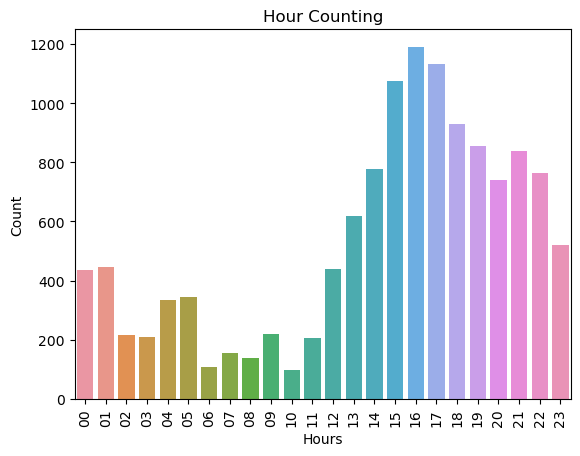

In [74]:
#plot in number of videos published corresponding to hours
plt.subplot()
g = sns.countplot( x = 'hour', data=filtered_df, order = sorted(filtered_df['hour'].unique()))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Hour Counting")
g.set_xlabel("Hours")
g.set_ylabel("Count")
plt.show()
#from the plot, we noticed that there are more trending videos published within time interval between 3pm to 6pm

In [75]:
#check the dataset after fraud check and adding day&hours
filtered_df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publishing_day,hour,min,sec
19651,s_FAjI51LPU,2018-01-07,Gas Mask Scene | Kong: Skull Island (2017),Adam Whitley,2017-08-14,1,20:33:41,gas mask samurai jordan vogt-roberts kong skul...,943,1,...,https://i.ytimg.com/vi/s_FAjI51LPU/default.jpg,False,False,False,Kong: Skull Island DVD and Blu-ray release dat...,Film & Animation,Monday,20,33,41
19693,CFwXUarN-wg,2018-01-12,GOALS GOALS GOALS,KickThePj,2018-01-07,1,16:30:41,kickthepj pjthekick goals 2018 goals resolutio...,83200,15262,...,https://i.ytimg.com/vi/CFwXUarN-wg/default.jpg,False,False,False,support the patreon! https://patreon.com/kickt...,Film & Animation,Sunday,16,30,41
19539,S4vKQbpOn5k,2017-12-30,The Applejack Problem,Jenny Nicholson,2017-12-27,1,04:42:08,[none],97298,5463,...,https://i.ytimg.com/vi/S4vKQbpOn5k/default.jpg,False,False,False,Next video is about star wars I promise.\n\nCl...,Film & Animation,Wednesday,04,42,08
19715,4yG_k2Zlw7Y,2018-01-14,GOING FISHING. A Stop motion Animation by Guldies,Guldies,2018-01-10,1,21:26:00,stop motion animation stop motion animation st...,99653,9033,...,https://i.ytimg.com/vi/4yG_k2Zlw7Y/default.jpg,False,False,False,2500 still pictures (4530 taken) played in 18 ...,Film & Animation,Wednesday,21,26,00
19558,S4vKQbpOn5k,2017-12-31,The Applejack Problem,Jenny Nicholson,2017-12-27,1,04:42:08,[none],100450,5577,...,https://i.ytimg.com/vi/S4vKQbpOn5k/default.jpg,False,False,False,Next video is about star wars I promise.\n\nCl...,Film & Animation,Wednesday,04,42,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40915,7_FJUSBFbJM,2018-04-21,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1300682,31813,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12
40916,7_FJUSBFbJM,2018-04-22,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1320153,31990,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12
40917,7_FJUSBFbJM,2018-04-23,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1335365,32145,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12
40918,7_FJUSBFbJM,2018-04-24,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,2018-04-12,43,21:00:12,bleacher report br nba game of zones golden st...,1347238,32235,...,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,Thursday,21,00,12


In [76]:
##Modeling

In [77]:
#First, we want to perform modeling regarding what time to stream the advertisement
#using model AutoRegressive Integrated Moving Average, which is a time series 
#forecasting model that incorporates auto correlation measures to model temporal 
#structure within the time series data to predict future values

In [84]:
pred1_df = filtered_df
pred1_df.head()
#reduce our data frame containing only columns we need for time series model
pred1_df = pred1_df[['trending_date', 'publish_date','views','hour']]
pred1_df

,trending_date,publish_date,views,hour
19651,2018-01-07,2017-08-14,943,20
19693,2018-01-12,2018-01-07,83200,16
19539,2017-12-30,2017-12-27,97298,04
19715,2018-01-14,2018-01-10,99653,21
19558,2017-12-31,2017-12-27,100450,04
...,...,...,...,...
40915,2018-04-21,2018-04-12,1300682,21
40916,2018-04-22,2018-04-12,1320153,21
40917,2018-04-23,2018-04-12,1335365,21
40918,2018-04-24,2018-04-12,1347238,21


In [85]:
pred1_df['trending_date'] = pd.to_datetime(pred1_df['trending_date'], format='%y.%d.%m').dt.date

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\229631662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred1_df['trending_date'] = pd.to_datetime(pred1_df['trending_date'], format='%y.%d.%m').dt.date


In [86]:
pred1_df['publish_date'] = pd.to_datetime(pred1_df['publish_date']).dt.date

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\403143125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred1_df['publish_date'] = pd.to_datetime(pred1_df['publish_date']).dt.date


In [87]:
#add a column of date_to_trend
date_diff = pred1_df

date_diff['date_diff'] = date_diff['trending_date']-date_diff['publish_date']

pred1_df['Days_to_Trend'] = date_diff['date_diff']/np.timedelta64(1,'D')
pred1_df.drop(['date_diff'], axis=1)

C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\484901164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_diff['date_diff'] = date_diff['trending_date']-date_diff['publish_date']
C:\Users\ticta\AppData\Local\Temp\ipykernel_28816\484901164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred1_df['Days_to_Trend'] = date_diff['date_diff']/np.timedelta64(1,'D')


,trending_date,publish_date,views,hour,Days_to_Trend
19651,2018-01-07,2017-08-14,943,20,146.0
19693,2018-01-12,2018-01-07,83200,16,5.0
19539,2017-12-30,2017-12-27,97298,04,3.0
19715,2018-01-14,2018-01-10,99653,21,4.0
19558,2017-12-31,2017-12-27,100450,04,4.0
...,...,...,...,...,...
40915,2018-04-21,2018-04-12,1300682,21,9.0
40916,2018-04-22,2018-04-12,1320153,21,10.0
40917,2018-04-23,2018-04-12,1335365,21,11.0
40918,2018-04-24,2018-04-12,1347238,21,12.0


In [ ]:
# Second, perform linear regression model on views with several variables

In [91]:
#obtain data frame for this modeling
pred2_df = filtered_df

In [92]:
#perform label encoder to convert labels into numeric form (prepare for ml)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in pred2_df.columns:
    if i in ['channel_title','category_name', 'publish_time','comments_disabled',
           'ratings_disabled', 'video_error_or_removed']:
        pred2_df[i] = le.fit_transform(pred2_df[i])
pred2_df.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,publishing_day,hour,min,sec
19651,s_FAjI51LPU,2018-01-07,Gas Mask Scene | Kong: Skull Island (2017),25,2017-08-14,1,1737,gas mask samurai jordan vogt-roberts kong skul...,943,1,...,https://i.ytimg.com/vi/s_FAjI51LPU/default.jpg,0,0,0,Kong: Skull Island DVD and Blu-ray release dat...,Film & Animation,Monday,20,33,41
19693,CFwXUarN-wg,2018-01-12,GOALS GOALS GOALS,477,2018-01-07,1,1126,kickthepj pjthekick goals 2018 goals resolutio...,83200,15262,...,https://i.ytimg.com/vi/CFwXUarN-wg/default.jpg,0,0,0,support the patreon! https://patreon.com/kickt...,Film & Animation,Sunday,16,30,41
19539,S4vKQbpOn5k,2017-12-30,The Applejack Problem,430,2017-12-27,1,333,[none],97298,5463,...,https://i.ytimg.com/vi/S4vKQbpOn5k/default.jpg,0,0,0,Next video is about star wars I promise.\n\nCl...,Film & Animation,Wednesday,04,42,08
19715,4yG_k2Zlw7Y,2018-01-14,GOING FISHING. A Stop motion Animation by Guldies,357,2018-01-10,1,1851,stop motion animation stop motion animation st...,99653,9033,...,https://i.ytimg.com/vi/4yG_k2Zlw7Y/default.jpg,0,0,0,2500 still pictures (4530 taken) played in 18 ...,Film & Animation,Wednesday,21,26,00
19558,S4vKQbpOn5k,2017-12-31,The Applejack Problem,430,2017-12-27,1,333,[none],100450,5577,...,https://i.ytimg.com/vi/S4vKQbpOn5k/default.jpg,0,0,0,Next video is about star wars I promise.\n\nCl...,Film & Animation,Wednesday,04,42,08


In [93]:
#get rid of columns that we won't use for this prediction
pred2_df = pred2_df[['channel_title','category_id', 'views','likes','dislikes','comment_count','comments_disabled', 'ratings_disabled','video_error_or_removed']]
pred2_df

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
19651,25,1,943,1,0,0,0,0,0
19693,477,1,83200,15262,26,881,0,0,0
19539,430,1,97298,5463,409,1636,0,0,0
19715,357,1,99653,9033,42,738,0,0,0
19558,430,1,100450,5577,413,1572,0,0,0
...,...,...,...,...,...,...,...,...,...
40915,107,43,1300682,31813,459,2148,0,0,0
40916,107,43,1320153,31990,460,2139,0,0,0
40917,107,43,1335365,32145,462,2143,0,0,0
40918,107,43,1347238,32235,465,2150,0,0,0


In [94]:
#we want to use 'views' columns as target variable 
#and remaining colums as feature column
X = pred2_df.drop('views',axis=1)
y = pred2_df.views
y.head(5)

19651       943
19693     83200
19539     97298
19715     99653
19558    100450
Name: views, dtype: int32

In [96]:
X.head()

,channel_title,category_id,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
19651,25,1,1,0,0,0,0,0
19693,477,1,15262,26,881,0,0,0
19539,430,1,5463,409,1636,0,0,0
19715,357,1,9033,42,738,0,0,0
19558,430,1,5577,413,1572,0,0,0


In [97]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X1 = X.to_numpy().astype(int)
y1 = y.to_numpy().astype(int)
X1
y1
type(X1)
X2 = sm.add_constant(X1)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     7329.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:31   Log-Likelihood:            -2.1380e+05
No. Observations:               12789   AIC:                         4.276e+05
Df Residuals:                   12780   BIC:                         4.277e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.589e+05   1.31e+05     -4.267      0.0

In [98]:
# Import library for VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#def calc_vif(X):
#    X = sm.add_constant(X)
#    # Calculating VIF
#    vif = pd.DataFrame()
#    vif["variables"] = X.columns
#    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#    return(vif)
#variance_inflation_factor(X.values, 0)
#calc_vif(X)

def vif(data):
    vif_list = []
    for i in range(data.shape[1]):
        y = data[:, i]
        x = np.delete(data, i, axis=1)
        coeffs = np.linalg.lstsq(x, y, rcond=None)[0]
        residuals = y - x @ coeffs
        r2 = 1 - (residuals.var() / y.var())
        vif_value = 1 / (1 - r2)
        vif_list.append(vif_value)
    return vif_list
vif(X1)

[0.7772094776306918,
 0.48248303148754645,
 3.2118809925847973,
 2.2190864168230435,
 5.288839469238458,
 1.0136462809804831,
 1.0094323219856127,
 1.0014397445895207]

In [99]:
X1 = X.drop('comment_count',axis=1).to_numpy().astype(int)
y1 = y.to_numpy().astype(int)
X2 = sm.add_constant(X1)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())
X = X.drop('comment_count',axis=1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     6155.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:20:23   Log-Likelihood:            -2.1537e+05
No. Observations:               12789   AIC:                         4.308e+05
Df Residuals:                   12781   BIC:                         4.308e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.398e+05   1.46e+05      5.066      0.0

In [100]:
vif(X.to_numpy().astype(int))
X.head
X1 = X.drop('category_id',axis=1).to_numpy().astype(int)
y1 = y.to_numpy().astype(int)
X2 = sm.add_constant(X1)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     7180.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:20:36   Log-Likelihood:            -2.1537e+05
No. Observations:               12789   AIC:                         4.308e+05
Df Residuals:                   12782   BIC:                         4.308e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.228e+05   9.15e+04      6.804      0.0

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [102]:
# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                 random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (10231, 7)
X_test:  (2558, 7)
y_train:  (10231,)
y_test:  (2558,)


In [103]:
#perform linear regression to predict values
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = model.predict(X_test)
y_pred

array([3900979.94533161, 1439420.64418405, 1402217.05284447, ...,
       -740979.35437818,  529888.66723065,  504090.79651731])

In [105]:
df_predict1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict1.head(10)
#our prediction seems a little off, not sure why

,Actual,Predicted
21200,5227761,3.900980e+06
8176,607740,1.439421e+06
32357,4176359,1.402217e+06
29926,2200274,5.669577e+06
27881,1856647,3.376828e+06
34907,2310168,3.729832e+06
15034,156425,3.422965e+05
18017,1181190,8.331197e+05
2595,352795,3.342876e+05
2985,5996281,1.412871e+07


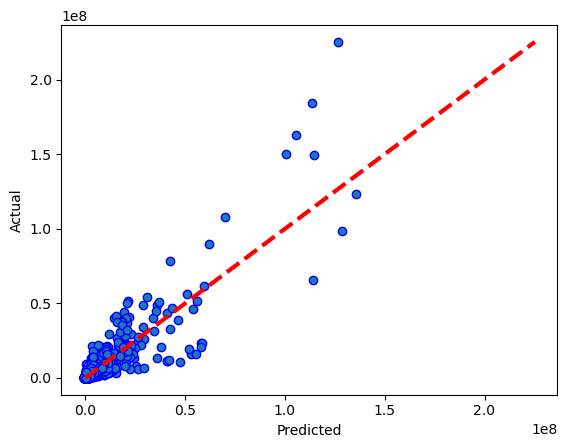

In [106]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [107]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("Mean Absolute Error on Testing Set: ", mean_absolute_error(y_test, 
                                                                  y_pred))
print("R-Squared Score on Testing Set: ", r2_score(y_test,y_pred))

Mean Absolute Error on Testing Set:  1634955.0074561853
R-Squared Score on Testing Set:  0.7899861826126718


In [108]:
#Try Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
y_ridge

array([3901209.11775284, 1439673.86747718, 1402425.89382008, ...,
       -740778.77988587,  530136.31466664,  504303.16204507])

In [109]:
df_ridge_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_ridge})
df_ridge_predict.head(10)

,Actual,Predicted
21200,5227761,3.901209e+06
8176,607740,1.439674e+06
32357,4176359,1.402426e+06
29926,2200274,5.669803e+06
27881,1856647,3.377063e+06
34907,2310168,3.730041e+06
15034,156425,3.425341e+05
18017,1181190,8.333410e+05
2595,352795,3.345110e+05
2985,5996281,1.412888e+07


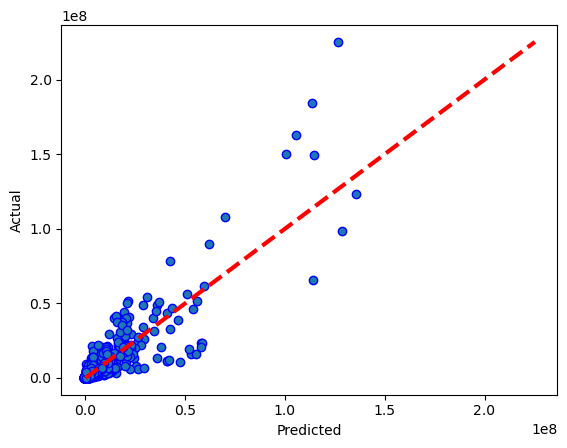

In [110]:
fig, ax = plt.subplots()
ax.scatter(y_ridge, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [111]:
print("Mean Absolute Error on Testing Set: ", mean_absolute_error(y_test, 
                                                                  y_ridge))
print("R-Squared Score on Testing Set: ", r2_score(y_test,y_ridge))

Mean Absolute Error on Testing Set:  1634877.847775013
R-Squared Score on Testing Set:  0.7899880515286044


In [ ]:
#From above, it's although the model seems to fit ok, while there's still
#doubts whether the variable we choose are good predictors of views

In [91]:
#Third, we want to perform modeling regarding which category of videos to 
#stream the advertisement